# Plot RomyControl Parameters

## Import Libraries

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import obspy
import numpy as np

from andbro__get_seconds import __get_seconds


## Configurations

In [86]:
config = {}

config['tbeg'] = "2022-02-02"
config['tend'] = "2022-02-03"

config['ring'] = "RV"

In [87]:
def __load_CROMY(start, end, ring=config['ring']):
    
    from obspy import UTCDateTime
    from andbro__get_seconds import __get_seconds

    tbeg = UTCDateTime(start)
    tend = UTCDateTime(end)
    
    if tbeg.date.year != tend.date.year:
        print("Error: Not same years!")
    
    
    for j, date in enumerate(np.arange(tbeg.date,(tend+86400).date)):

        filename = f"{str(date).replace('-','')}_control.txt"
        
        path_to_files = f"/import/freenas-ffb-01-data/romy_archive/{str(date)[:4]}/BW/CROMY/{ring}/"
        
        try:
            df0 = pd.read_csv(path_to_files+filename)

            df0 = df0.iloc[::int(nth_row)]

            if j == 0:
                df = df0
            else:
                df = pd.concat([df, df0], ignore_index=True)
        except: 
            print(f"Failed to load {filename}")
            
    ## add time axis
    df['times'] = [__get_seconds(df.datetime[j], mode="of_year") for j in range(df.datetime.size)]

    return df

In [88]:
def __cut_dataframe(df, starttime, endtime, column_name_of_total_seconds=None):
    
    from andbro__get_seconds import __get_seconds

    if column_name_of_total_seconds is not None:
        tbeg_sec = __get_seconds(starttime, mode="of_year")
        tend_sec = __get_seconds(endtime, mode="of_year")

        df = df[(df[column_name_of_total_seconds] >= tbeg_sec) & (df[column_name_of_total_seconds] <= tend_sec)]
    else:
        print("Error")
    
    df.reset_index(drop=True, inplace=True)
    
    return df

In [89]:
def __makeplot_parameters2(df, roll_length=50):
    
    
    from obspy import UTCDateTime

    N = int(df.datetime.size-1)
    xdays = (UTCDateTime(df.datetime[N]) - UTCDateTime(df.datetime[0])) / 86400

    if xdays > 2: 
        timeaxis = np.array((df.times-df.times[0])/86400)
        timeunit = "days"
        
    else:
        timeaxis = np.array((df.times-df.times[0])/3600)
        timeunit = "hours"
    
    ## plotting -----------------------------
    
    N = 3
    font = 12
    
    fig, ax = plt.subplots(N,1,figsize=(15,8), sharex=True)
    
    ax[0].plot(timeaxis, df.F0.rolling(roll_length).mean(), lw=0.7, alpha=0.8, color='grey', zorder=2)
    ax[0].scatter(timeaxis, df.F0, s=0.5, color='darkred', zorder=3)
#     ax[0].semilogy(timeaxis, df.F0.rolling(roll_length).mean(), color='darkred', zorder=2)
    
    ax[1].plot(timeaxis, df.AC.rolling(roll_length).mean(), lw=0.7, alpha=0.8, color='grey', zorder=2)
    ax[1].scatter(timeaxis, df.AC, s=0.5, color='darkgreen', zorder=3)
#     ax[1].semilogy(timeaxis, df.AC.rolling(roll_length).mean(), color='darkgreen', zorder=2)
    
    ax[2].plot(timeaxis, df.DC.rolling(roll_length).mean(), lw=0.7, alpha=0.8, color='grey', zorder=2)
    ax[2].scatter(timeaxis, df.DC, s=0.5, color='darkblue', zorder=3)
#     ax[2].semilogy(timeaxis, df.DC.rolling(roll_length).mean(), color='darkblue', zorder=2)
   
    
    ax[0].set_ylabel("F0 (Hz)", fontsize=font)
    ax[1].set_ylabel("AC (V)", fontsize=font)
    ax[2].set_ylabel("DC (V)", fontsize=font)
    ax[N-1].set_xlabel(f"Time ({timeunit}) from {df.datetime[0][:10]} {df.datetime[0][11:]} UTC", fontsize=font)
    
    for i in range(N):
        ax[i].set_xlim(np.array(timeaxis[0]), timeaxis[-1])
        ax[i].grid(alpha=0.7, zorder=0, ls=":", color="grey")

    return fig

In [90]:
df = __load_CROMY(config['tbeg'], config['tend'], ring=config['ring'])
df

,datetime,AC,DC,F0,ACmean,DCmean,times
0,2022-02-02T00:00:00,1.76,1.04,446.93,1.759,1.039,2851200.0
1,2022-02-02T00:00:01,1.75,1.03,447.60,1.759,1.038,2851201.0
2,2022-02-02T00:00:02,1.77,1.04,447.35,1.760,1.038,2851202.0
3,2022-02-02T00:00:03,1.75,1.03,447.35,1.759,1.038,2851203.0
4,2022-02-02T00:00:04,1.73,1.04,447.35,1.757,1.038,2851204.0
...,...,...,...,...,...,...,...
71625,2022-02-03T09:59:58,1.71,1.03,447.35,1.703,1.032,2973598.0
71626,2022-02-03T09:59:59,1.71,1.04,447.60,1.704,1.032,2973599.0
71627,2022-02-03T10:00:00,1.70,1.03,446.93,1.704,1.033,2973600.0
71628,2022-02-03T10:00:01,1.71,1.03,447.35,1.705,1.033,2973601.0


In [91]:
# df_sel = __cut_dataframe(df, "2021-12-22 00:00", "2021-12-22 15:00", column_name_of_total_seconds="times")   
# df_sel

## Plot

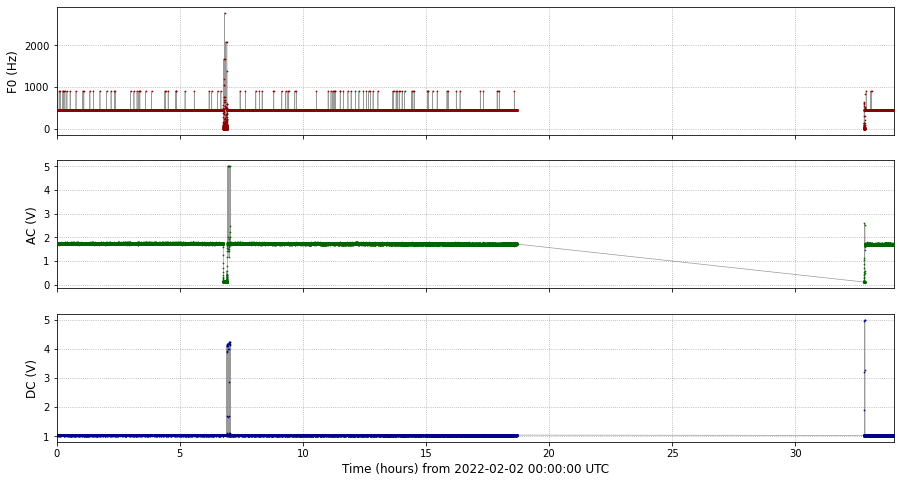

In [92]:
fig = __makeplot_parameters2(df, roll_length=1)